In [25]:
import os, cv2, numpy
from glob import glob
import matplotlib.pyplot as plt

dataset = "/home/kmit/Desktop/bvr/tubule segmentation/tubule_resize/"
imagePatch = '/home/kmit/Desktop/bvr/tubule segmentation/resize4/image/'
maskPatch = '/home/kmit/Desktop/bvr/tubule segmentation/resize4/mask/'
imageList = glob(dataset+'*[0-9].bmp')
maskList = glob(dataset+'*_anno.bmp')
len(maskList)

85

In [29]:
# ckt = 0
# imageList = sorted(os.listdir(imagePatch))
# maskList = sorted(os.listdir(maskPatch))
# for i,j in zip(imageList, maskList):
#     if(i + '_anno' == j):
#         ckt += 1# print(ckt)


In [30]:

for image in imageList:
    imageFolder = imagePatch + image
    maskFolder = maskPatch + image +'_anno'
    images = os.listdir(imageFolder)
    for img in images:
        im = cv2.imread(imageFolder+'/'+img)
        mk = cv2.imread(maskFolder+'/'+img[:-6] + '_anno-' +img[-5:],0).reshape(256,256,1)
        x.append(im); y.append(mk)

FileNotFoundError: [Errno 2] No such file or directory: '/home/kmit/Desktop/bvr/tubule segmentation/resize4/image//home/kmit/Desktop/bvr/tubule segmentation/tubule_resize/m2_10449-11E-T3N1b_1.bmp'

In [18]:
y

[]

In [32]:
x,y = [],[]
for i in range(85):
    x.append(cv2.flip(x[i], -1))
    x.append(cv2.flip(x[i], 0))
    x.append(cv2.flip(x[i], 1))
    y.append(cv2.flip(y[i], -1).reshape(256,256,1))
    y.append(cv2.flip(y[i], 0).reshape(256,256,1))
    y.append(cv2.flip(y[i], 1).reshape(256,256,1))

x = numpy.asarray(x); y = numpy.asarray(y)
print(x.shape, y.shape)

IndexError: list index out of range

In [ ]:
for i in imageList:
    os.mkdir(imagePatch+i[59:-4])
for i in maskList:
    os.mkdir(maskPatch+i[59:-4])

In [ ]:
from PIL import Image
import os

def crop(infile,height,width):
    im = Image.open(infile)
    imgwidth, imgheight = im.size
    for i in range(imgheight//height):
        for j in range(imgwidth//width):
            box = (j*width, i*height, (j+1)*width, (i+1)*height)
            print(box)
            yield im.crop(box)

if __name__=='__main__':
    for infile in maskList:
        height= 256
        width= 256
        for k,piece in enumerate(crop(infile,height,width)):
            img=Image.new('RGB', (height,width), 255)
            img.paste(piece)
            name = infile[59:-4]
            path=os.path.join('./image_patches/mask/'+name,name+"-%s.png" % k)
            img.save(path)

In [ ]:
def im2patch(img):
    y_slide = 256
    x_slide = 256 
    patches = []
    nseg = img.shape[0]//256
    for h in range(nseg):
        for w in range(nseg):
            patches.append(img[(y_slide*h):(y_slide*(h+1)), (x_slide*w):(x_slide*(w+1))])
    return patches

import matplotlib.pyplot as plt
import matplotlib.image as mage
temp_image = image.copy()
patches = im2patch(temp_image)
print(len(patches))
for patch in patches:
    plt.figure()
    plt.imshow(patch)

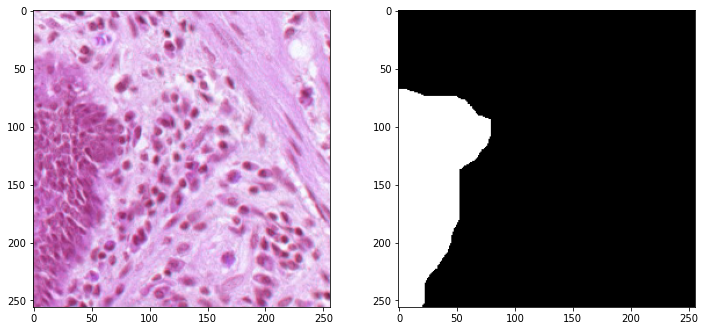

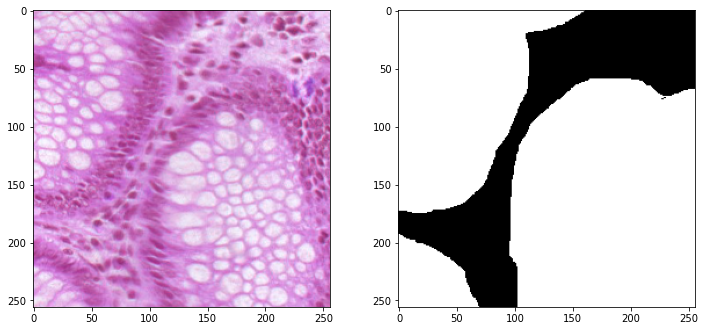

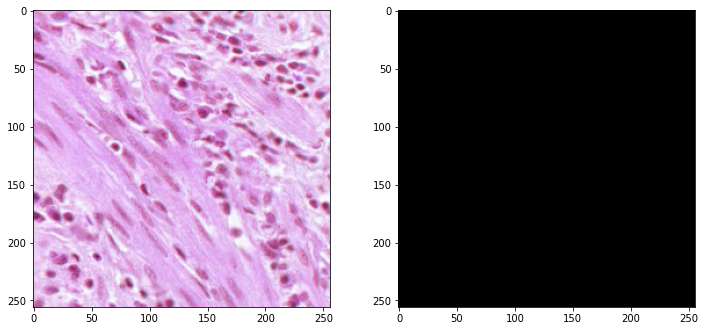

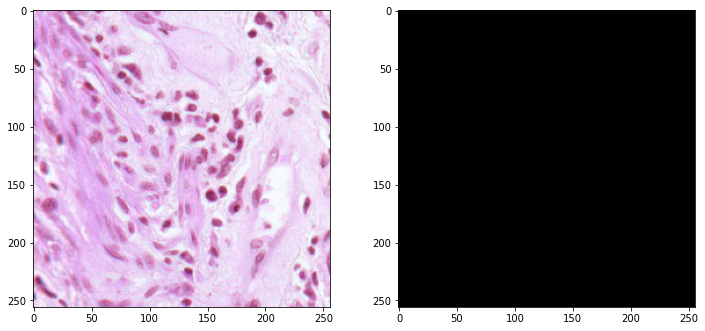

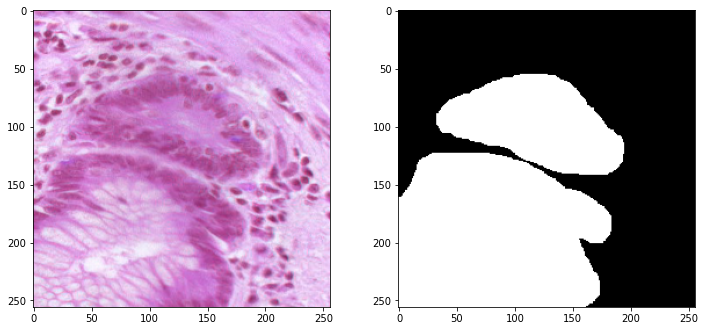

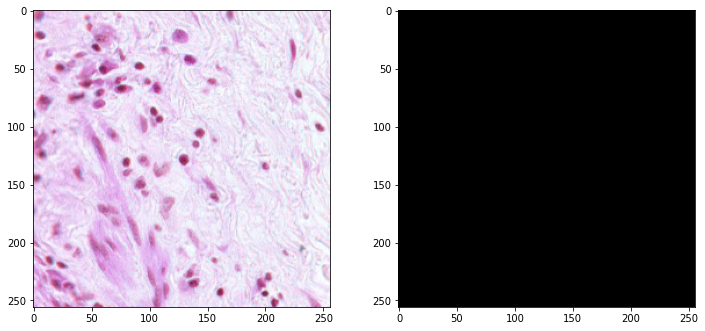

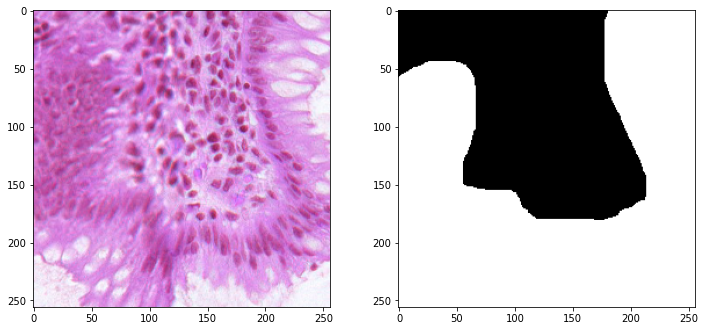

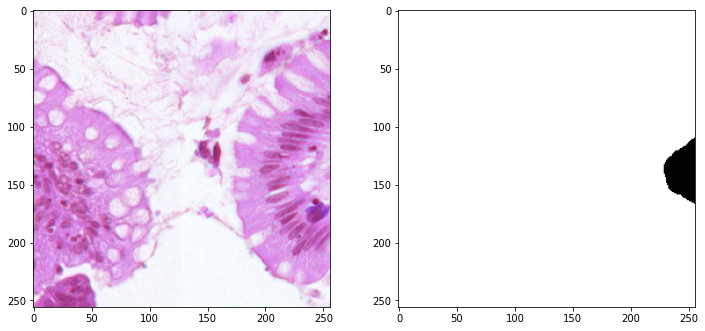

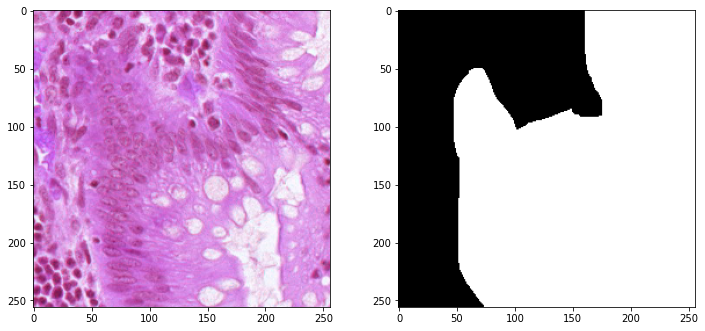

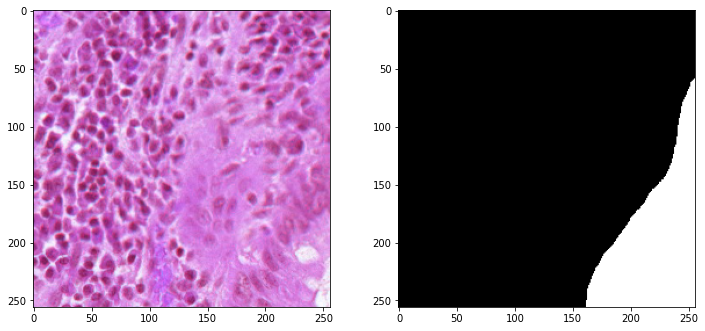

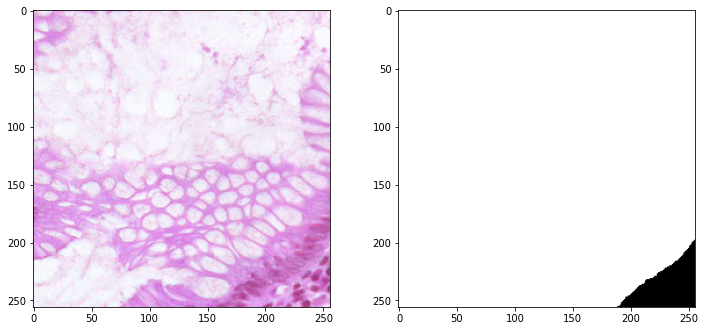

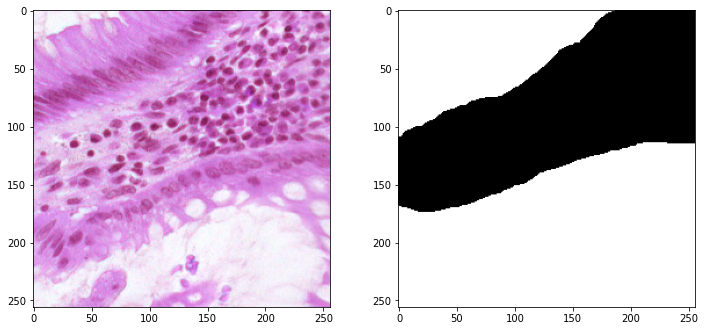

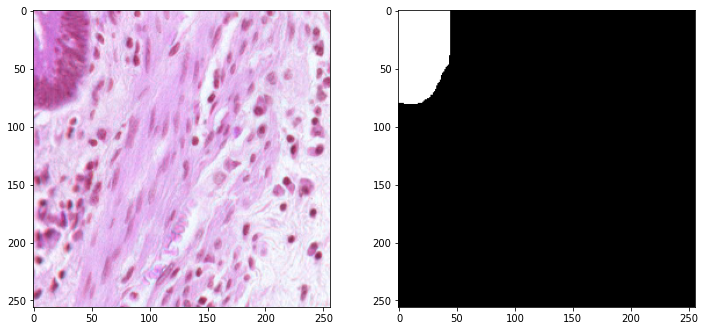

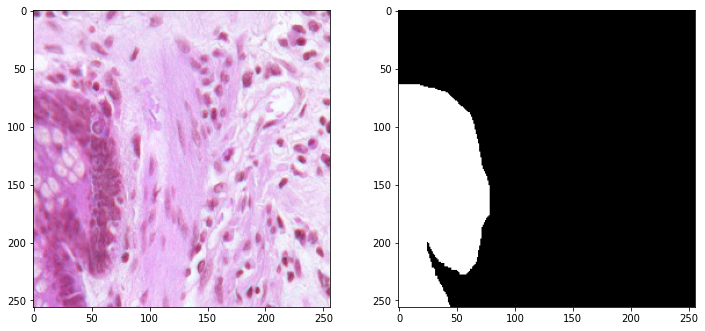

In [148]:
for i in range(6,20):
    fig = plt.figure(figsize=(12,12))
    ax1 = fig.add_subplot(2,2,1)
    ax1.imshow(x[i])
    ax2 = fig.add_subplot(2,2,2)
    ax2.imshow(y[i], cmap='gray')
    plt.show()

In [19]:
numpy.save("Y_Tubule_256x256_480_Augmented_v1_NoNormal",y)
numpy.save("X_Tubule_256x256_480_Augmented_v1_NoNormal",x)

In [2]:
dataset = "/home/kd/Documents/tubule_segmentation/Work/patches/tubule/"
maskList = [dataset + '09-322-02-1.bmp']
from PIL import Image
import os

def crop(infile,height,width):
    im = Image.open(infile)
    imgwidth, imgheight = im.size
    for i in range(imgheight//height):
        for j in range(imgwidth//width):
            box = (j*width, i*height, (j+1)*width, (i+1)*height)
            print(box)
            yield im.crop(box)

for infile in maskList:
    height= 256
    width= 256
    for k,piece in enumerate(crop(infile,height,width)):
        print()
        #img=Image.new('RGB', (height,width), 255)
        #img.paste(piece)
        #name = infile[59:-4]
        #path=os.path.join('./image_patches/mask/'+name,name+"-%s.png" % k)
        #img.save(path)

(0, 0, 256, 256)

(256, 0, 512, 256)

(512, 0, 768, 256)

(0, 256, 256, 512)

(256, 256, 512, 512)

(512, 256, 768, 512)

